# (연구&교수님) 다중척도논문 – SiZer

최규빈  
2024-07-10

In [1]:
#install.packages("SiZer")

In [2]:
library(devtools)
install_github("seoyeonc/gglite",force=TRUE)
library(gglite)
library(tidyverse)
library(patchwork)

Loading required package: usethis



Attaching package: ‘gglite’


The following objects are masked from ‘package:stats’:

    density, line, smooth, step


The following object is masked from ‘package:graphics’:

    boxplot


The following objects are masked from ‘package:base’:

    col, jitter


Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all c

── R CMD build ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpaiAGpE/remotesfa18456db8c3b/seoyeonc-gglite-1c0c2e5/DESCRIPTION’
─  preparing ‘gglite’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘gglite_0.1.0.tar.gz’
   


In [46]:
figsize()

# 1. Sizer 기본개념

SiZer 분석은 다양한 밴드위스에서 데이터 스무딩을 통해 시간 시계열
데이터의 트렌드를 분석하는 방법이다. 여기서 밴드위스는 데이터를 스무딩할
때 사용하는 창의 너비를 의미한다. SiZer 분석은 각 밴드위스에서 스무딩된
데이터의 1차 도함수를 계산하여, 그 도함수의 값이 양수인지(증가 추세),
음수인지(감소 추세), 아니면 0에 가까운지를 확인한다.

### 밴드위스에서 변화의 통계적 유의미성

-   **통계적 유의미성**: 특정 밴드위스에서 변화가 통계적으로
    유의미하다는 것은, 해당 밴드위스에서 관찰된 트렌드(증가 또는 감소)가
    데이터의 잡음이나 우연에 의한 것이 아니라 실제로 존재하는 트렌드임을
    의미한다.
-   **통계적으로 유의미하지 않음**: 특정 밴드위스에서 변화가 통계적으로
    유의미하지 않다는 것은, 해당 밴드위스에서 관찰된 변화가 데이터의
    잡음이나 우연에 의한 것일 가능성이 높다는 것을 의미한다. 즉, 그
    밴드위스에서의 변화가 실제 트렌드가 아닐 수 있다는 것을 뜻한다.

SiZer 분석을 통해 다양한 밴드위스에서의 트렌드를 확인함으로써, 데이터의
잡음에 의한 변화를 걸러내고 실제로 의미 있는 트렌드를 파악할 수 있다.

# 2. 기본 SiZer 분석

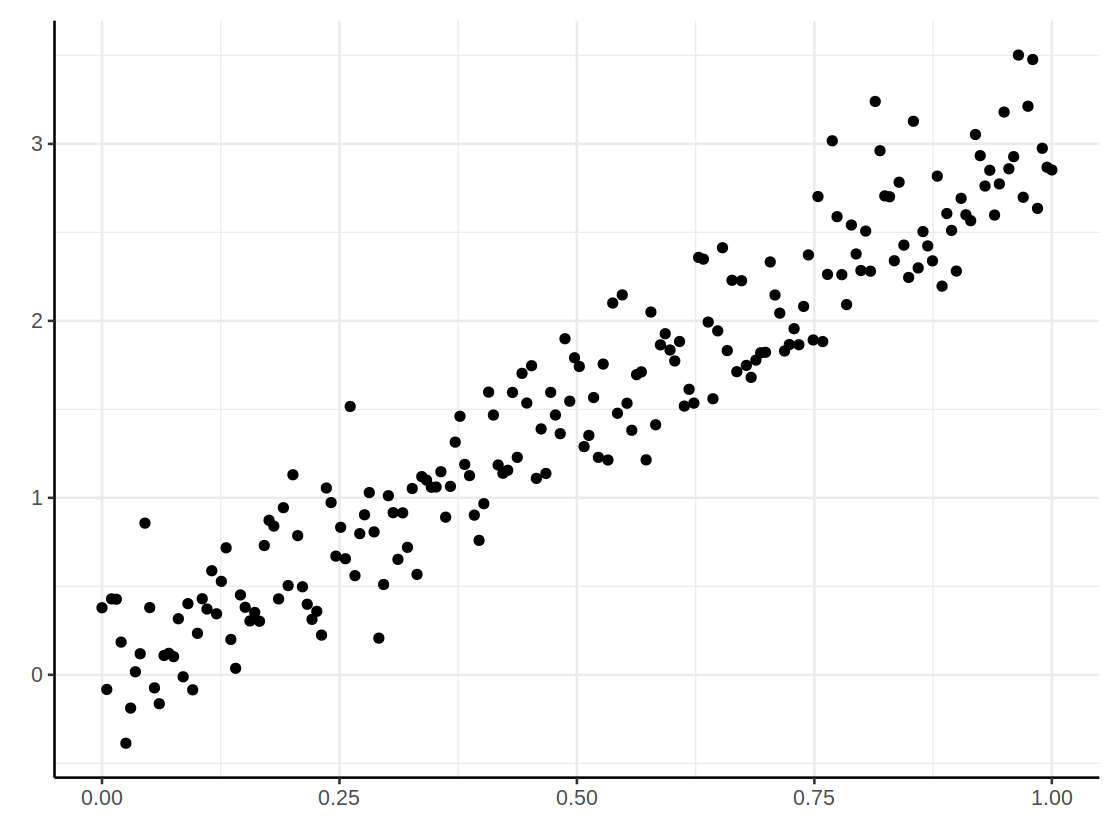

In [63]:
# 필요한 패키지 로드
#install.packages("SiZer")
library(SiZer)

# 시계열 데이터 생성
set.seed(0)
t <- seq(0, 1, length.out = 200)
trend <- 3 * t
noise <- rnorm(length(t), 0, 0.3)
time_series <- trend + noise

# 시계열 데이터 시각화
#  plot(t, time_series, type = 'l', main = 'Time Series with Trend and Noise', xlab = 'Time', ylab = 'Value')
gglite() + point(t,time_series) + xlab("") + ylab("")

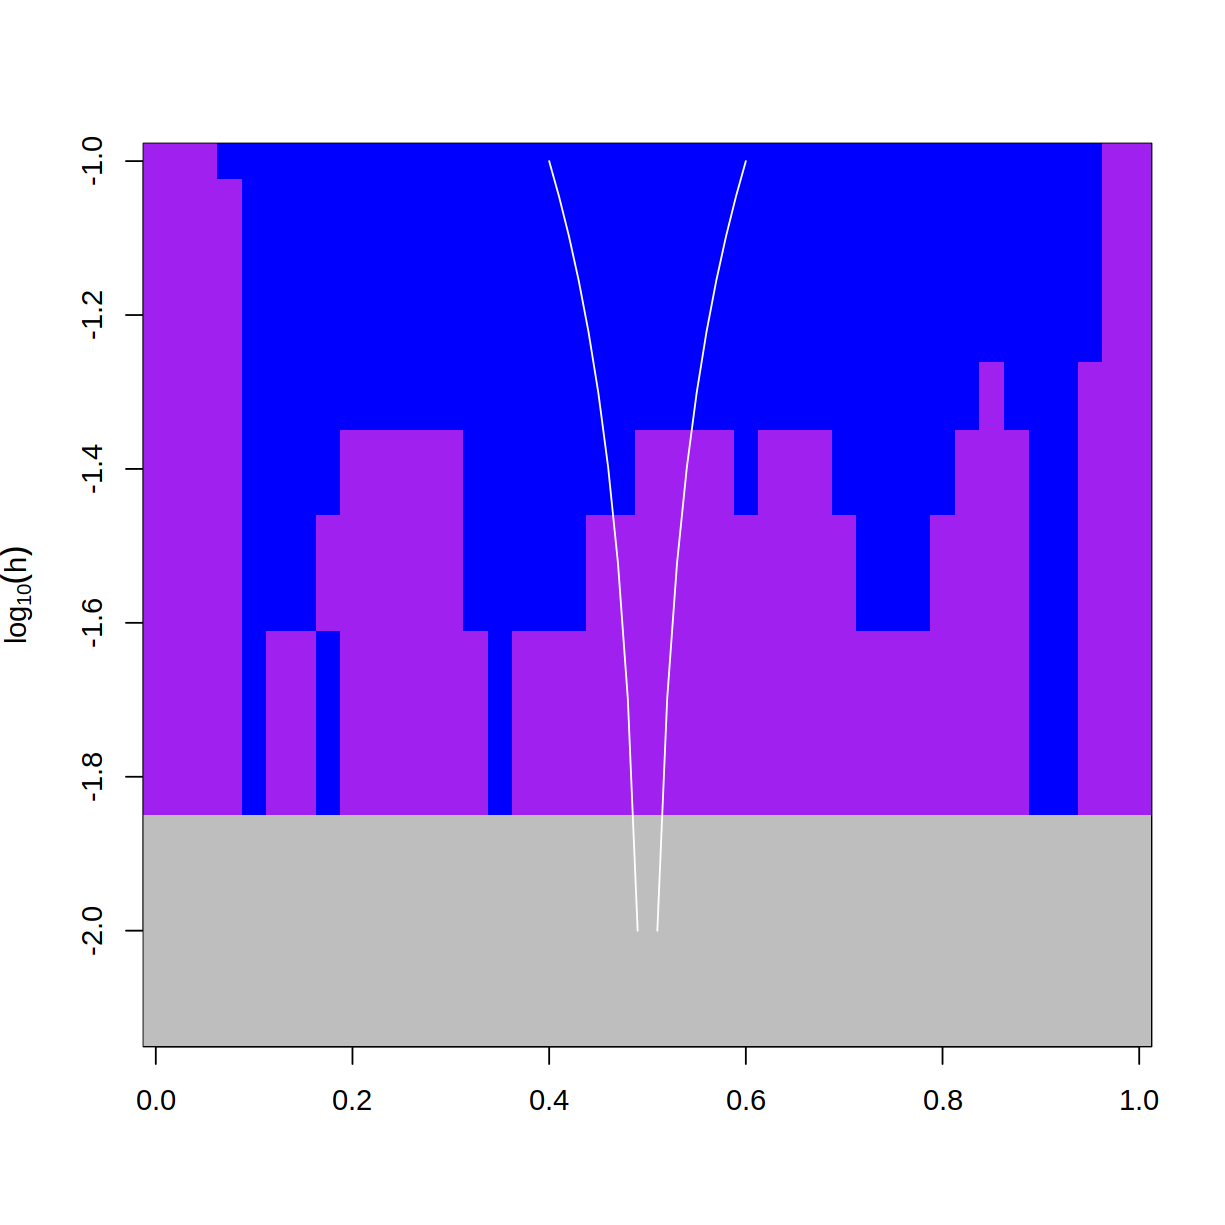

In [62]:
# 다양한 밴드위스 사용
sizer_result <- SiZer(x = t, y = time_series, h = seq(0.01, 0.1, by = 0.01))

# SiZer 결과 시각화
figsize(7,7)
plot(sizer_result,xlab="")
figsize()

### SiZer 결과 해석

SiZer 플롯에서는 각 밴드위스에 대한 추세의 통계적 유의성을 시각적으로
확인할 수 있음: - y축의 값이 작은 영역: 작은 밴드위스를 사용한 결과를
나타냄 - y축의 값이 큰 영역: 큰 밴드위스를 사용한 결과를 나타냄

**플롯 색상 의미:** - 파란색 영역: 해당 밴드위스에서 증가 추세가
통계적으로 유의미함을 나타냄 - 빨간색 영역: 해당 밴드위스에서 감소
추세가 통계적으로 유의미함을 나타냄 - 보라색 영역: 해당 밴드위스에서
변화가 통계적으로 유의미하지 않음을 나타냄

### 다양한 밴드위스 사용의 중요성

**세부 변화 탐지:** - 작은 밴드위스를 사용하면 데이터의 세부적인 변화를
감지할 수 있음 - 데이터의 세밀한 구조를 이해하는 데 유용함

**전체 트렌드 이해:** - 큰 밴드위스를 사용하면 데이터의 전반적인
트렌드를 이해할 수 있음 - 데이터의 큰 흐름을 파악하는 데 유용함

**다중 스케일 분석:** - 여러 밴드위스를 동시에 사용하면 데이터의 여러
스케일에서 중요한 변화를 탐지할 수 있음 - 다양한 수준에서 데이터의
특성을 이해하는 데 도움이 됨

### 종합 정리

-   SiZer 분석은 다양한 밴드위스를 사용하여 데이터의 중요한 추세를 여러
    스케일에서 분석할 수 있는 강력한 도구임.
-   이를 통해 데이터의 전반적인 흐름뿐만 아니라 세부적인 변화까지도
    정확히 파악할 수 있음.
-   SiZer의 다중 스케일 분석 기능은 데이터 분석에서 매우 유용하며, 특히
    복잡한 시계열 데이터에서 중요한 통계적 특징을 식별하는 데 효과적임.

# 3. 복잡한 시계열

In [52]:
# 복잡한 시계열 데이터 생성
set.seed(0)
t <- seq(0, 1, length.out = 200)
trend <- 3 * t + sin(2 * pi * t * 10)
noise <- rnorm(length(t), 0, 0.3)
complex_series <- trend + noise

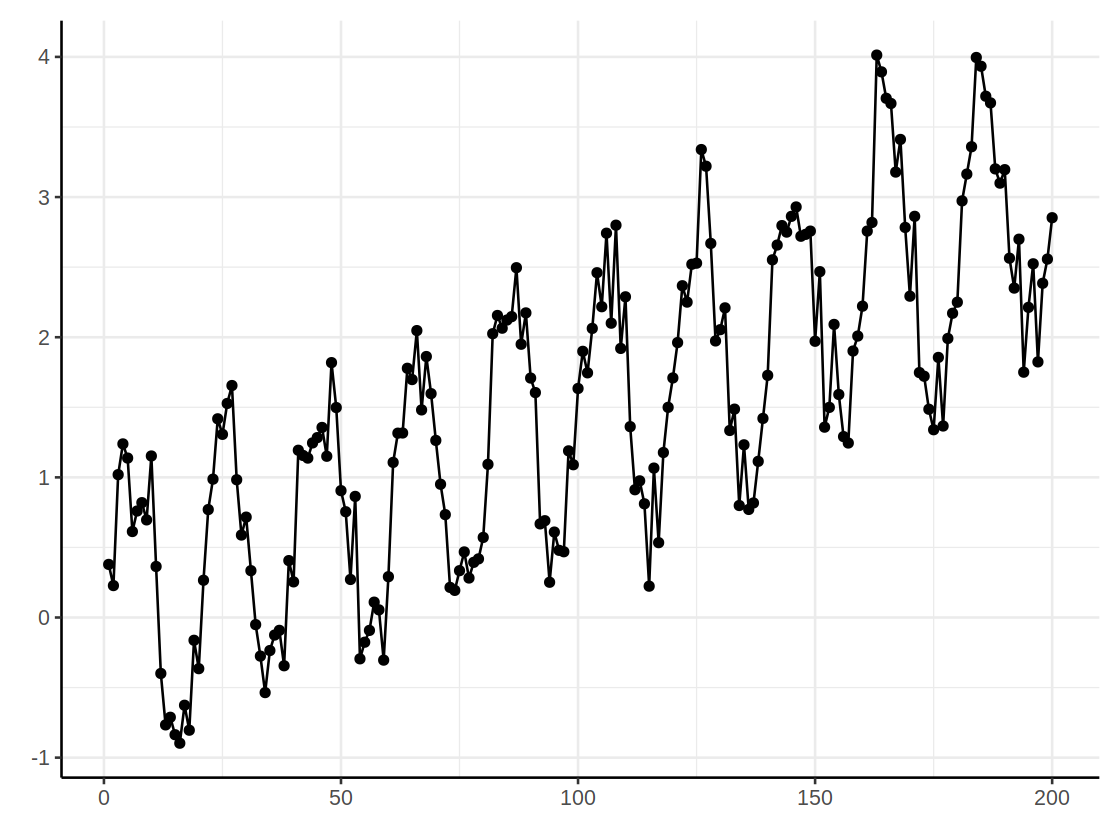

In [67]:
gglite()+point(complex_series)+line(complex_series)+ xlab("") + ylab("")

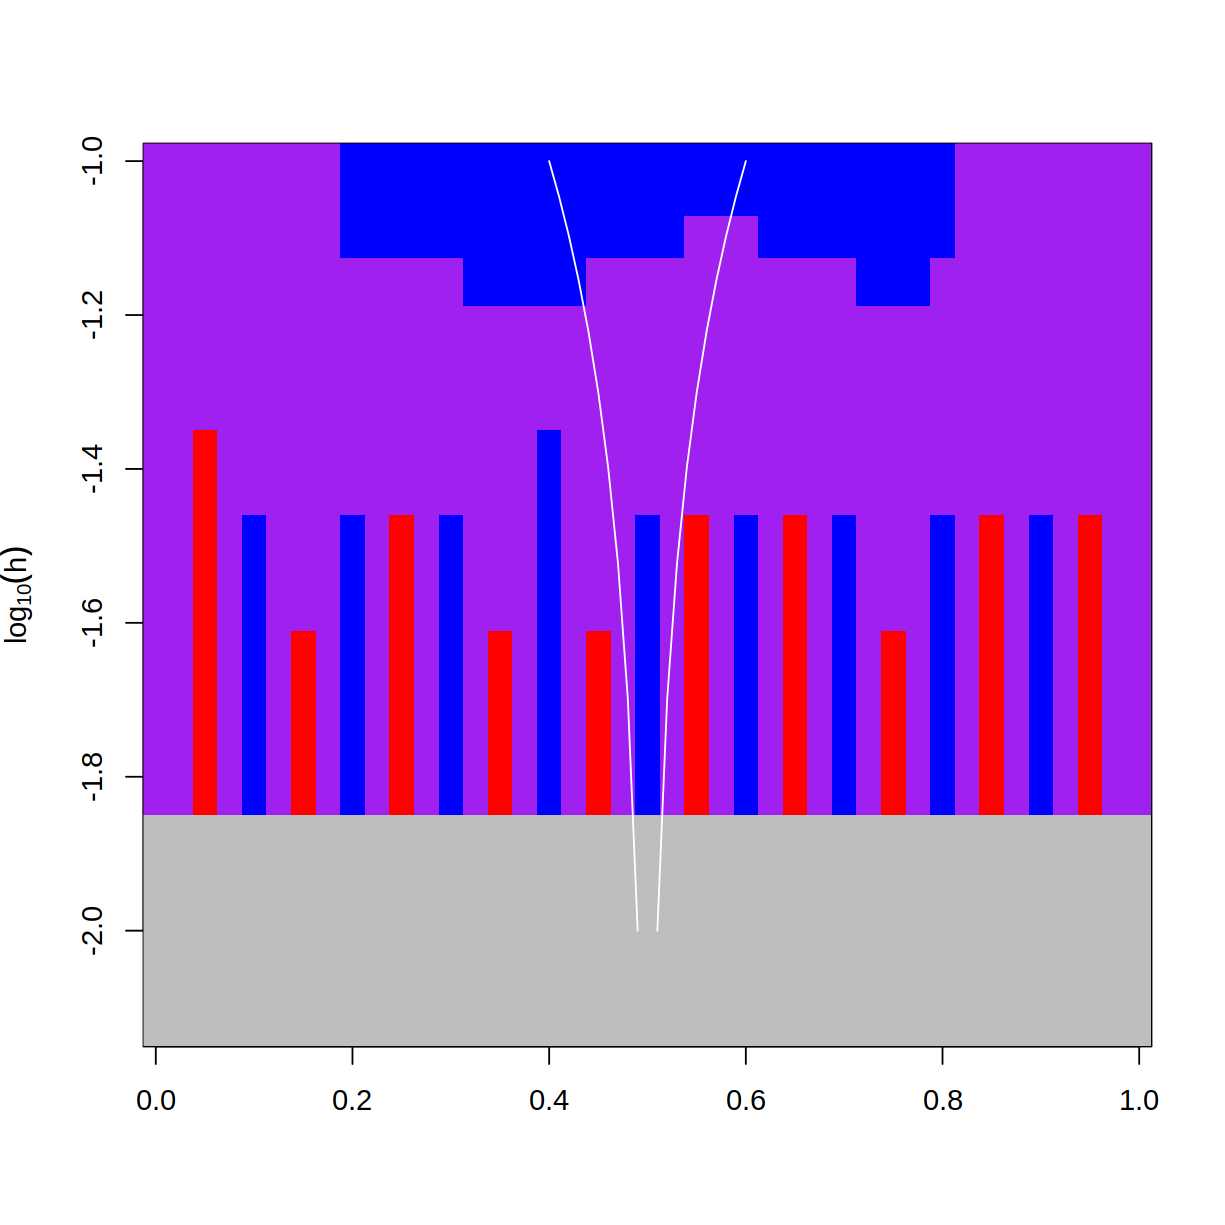

In [61]:
# SiZer 분석
sizer_result <- SiZer(x = t, y = complex_series, h = seq(0.01, 0.1, by = 0.01))

# 결과 시각화
figsize(7,7)
plot(sizer_result, xlab = "")
figsize()

# 4. Nile

In [56]:
# Nile 데이터셋 사용
data("Nile")
nile_data <- data.frame(
  Year = time(Nile),
  Flow = as.numeric(Nile)
)

Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.

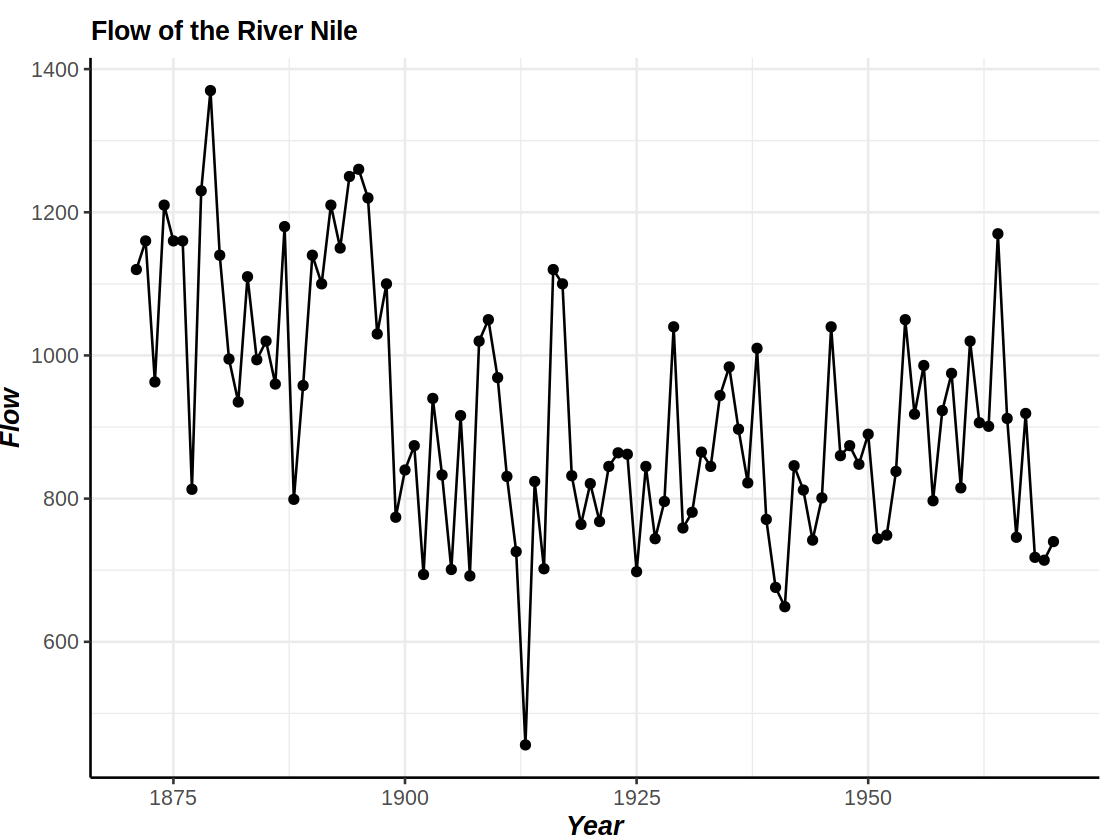

In [57]:
# ggplot으로 시각화
gglite(nile_data, aes(x = Year, y = Flow)) +
  geom_line() + geom_point() +
  labs(title = "Flow of the River Nile",
       x = "Year",
       y = "Flow")

이 자료는 R의 `Nile` 데이터셋을 시각화한 것이다. `Nile` 데이터셋은
1871년부터 1970년까지의 100년 동안 나일 강의 연간 흐름량을 기록한 시계열
데이터다.

### 주요 내용

-   **플롯 유형**: 이 플롯은 선 그래프와 점 그래프를 결합한 형태로, 나일
    강의 연간 흐름량 변화를 시각적으로 나타낸다.
-   **x축 (Year)**: 1871년부터 1970년까지의 연도.
-   **y축 (Flow)**: 각 연도에 측정된 나일 강의 흐름량.

### 해석

-   **연도별 흐름량 변동**: 플롯은 100년 동안 나일 강의 흐름량이 어떻게
    변했는지를 보여준다. 흐름량은 시간이 지남에 따라 증가하고 감소하는
    패턴을 보인다.
-   **주요 트렌드**: 플롯을 통해 특정 기간 동안 흐름량이 증가하거나
    감소하는 경향을 쉽게 파악할 수 있다.

이 플롯을 통해 나일 강의 흐름량 변화와 주요 트렌드를 시각적으로 이해할
수 있다.

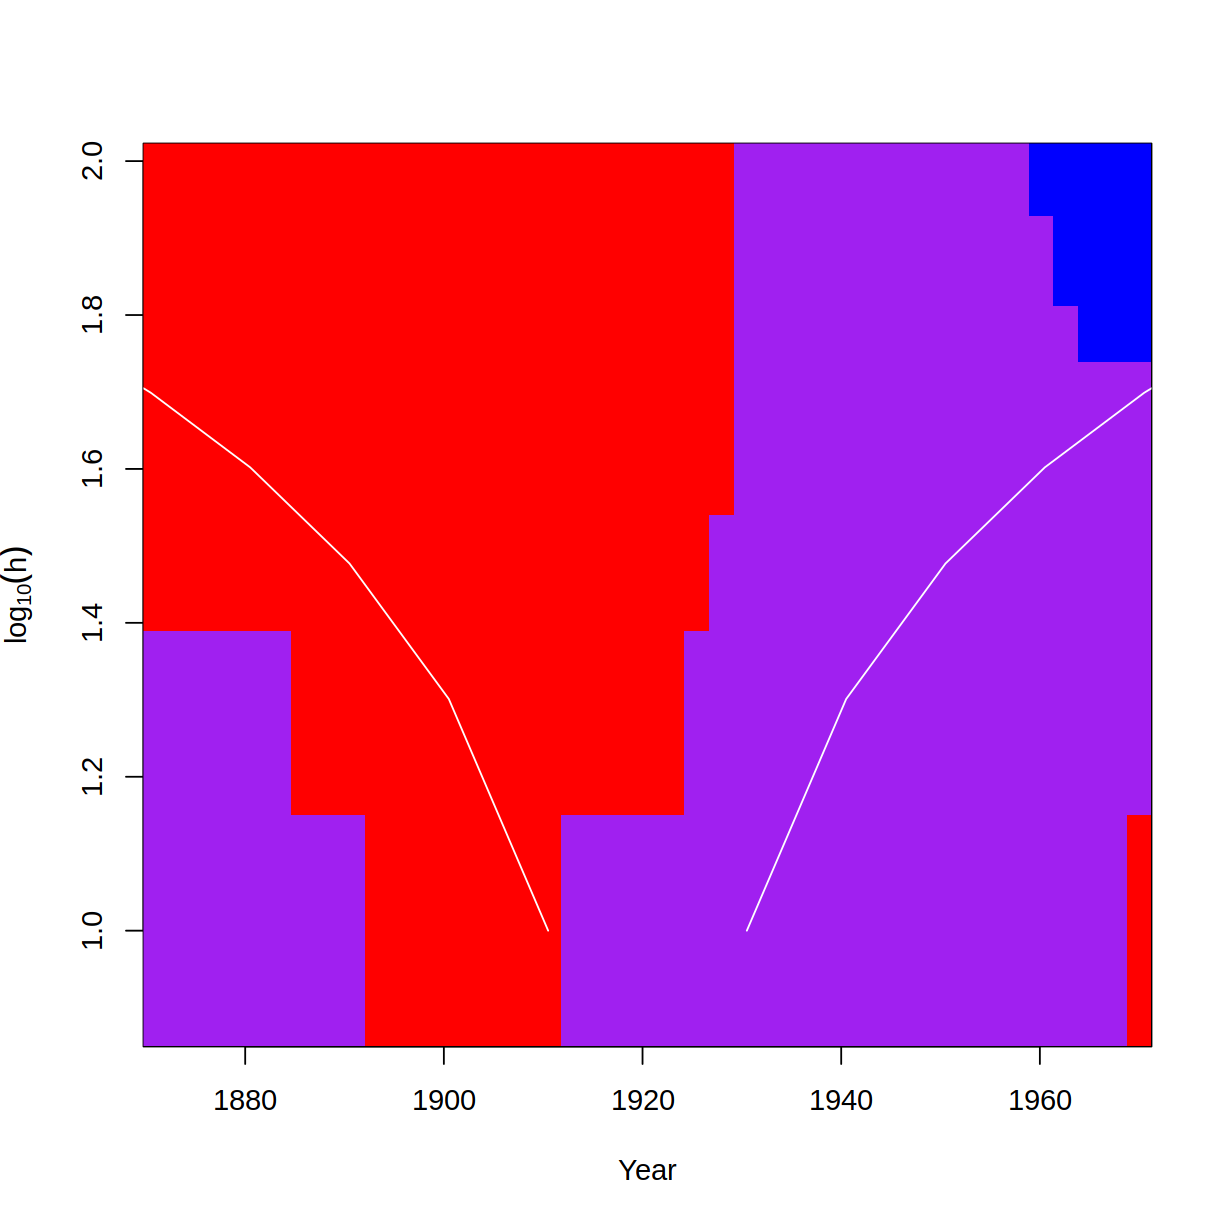

In [59]:
# SiZer 분석
sizer_result <- SiZer(x = time(Nile), y = as.numeric(Nile), h = seq(10, 100, by = 10))

# 결과 시각화
figsize(7,7)
plot(sizer_result, xlab = "Year")
figsize()

이 그림은 `Nile` 데이터셋을 SiZer(SIgnificant ZERo crossings) 방법으로
분석한 결과를 시각화한 것이다. SiZer 플롯은 다양한 밴드위스에서 데이터의
추세를 시각적으로 보여주며, 추세의 통계적 유의미성을 평가한다. 각 색상은
데이터의 증가, 감소, 혹은 유의미하지 않은 변화를 나타낸다.

### 그림 해석

-   **y축 (log10(h))**: 밴드위스의 로그 스케일 값을 나타냄. 밴드위스는
    데이터를 스무딩할 때 사용하는 창의 너비를 의미하며, y축 값이
    작을수록 작은 밴드위스를, y축 값이 클수록 큰 밴드위스를 의미함.
-   **x축 (x\$x.grid)**: 연도. 나일 강의 연간 흐름량이 기록된 시간
    범위를 나타냄.

### 색상 의미

-   **파란색 영역**: 해당 밴드위스에서 증가 추세가 통계적으로 유의미함을
    나타냄.
-   **빨간색 영역**: 해당 밴드위스에서 감소 추세가 통계적으로 유의미함을
    나타냄.
-   **보라색 영역**: 해당 밴드위스에서 변화가 통계적으로 유의미하지
    않음을 나타냄.

### 주요 해석

-   **1870년대~1900년대 초반**:
    -   대부분의 밴드위스에서 감소 추세(빨간색)가 유의미함.
-   **1900년대 초반~1940년대**:
    -   주로 보라색 영역으로, 이 시기에는 대부분의 밴드위스에서
        통계적으로 유의미한 변화가 없음.
-   **1940년대 후반~1960년대**:
    -   다양한 밴드위스에서 증가 추세(파란색)가 유의미함.

### 결론

SiZer 플롯을 통해 나일 강의 연간 흐름량 변화에서 다음과 같은 중요한
패턴을 파악할 수 있음:

1.  1870년대부터 1900년대 초반까지는 주로 감소 추세가 유의미하게 나타남.
2.  1900년대 초반부터 1940년대까지는 통계적으로 유의미한 변화가 거의
    없음.
3.  1940년대 후반부터 1960년대까지는 증가 추세가 유의미하게 나타남.

이러한 분석은 나일 강의 흐름량이 시간에 따라 어떻게 변화했는지, 그리고
그 변화가 통계적으로 유의미한지에 대한 통찰을 제공함.